# Imports

In [67]:
from my_import import *

path = kagglehub.dataset_download("svanoo/myanimelist-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\svanoo\myanimelist-dataset\versions\2


# Dataset analysis and cleaning

In [6]:
#Collumns that we are interested in
cols_to_use = ['anime_id', 'title', 'synopsis', 'genres' , 'score']
#Read the file while only taking certain collumns
full_df=pd.read_csv(r"C:\Users\User\.cache\kagglehub\datasets\svanoo\myanimelist-dataset\versions\2\anime.csv",
               sep='\t',
               usecols=cols_to_use)
print("Original Dataset")
print("Shape of the Dataset:",full_df.shape)
#Display fiest five columns of the dataset
display(full_df)


Original Dataset
Shape of the Dataset: (13379, 5)


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


In [7]:
#Finds rows with missing synopsis
missing_synopsis = full_df[full_df['synopsis'].isnull() | (full_df['synopsis'] == ".")]
print("Finding rows with missing synopsis")
display(missing_synopsis)
print("Number of missing synopsis:",len(missing_synopsis))

#Removes the rows with missing synopsis
df_cleaned = full_df[~(full_df['synopsis'].isnull() | (full_df['synopsis'] == "."))]
print("Cleaned df")
display(df_cleaned)


Finding rows with missing synopsis


,anime_id,title,synopsis,genres,score
6,49065,Shuimu Xuetang 2nd Season,.,Comedy|Kids,NaN
7,48335,Canimals,.,Comedy|Kids,NaN
18,51119,Grisaia: Phantom Trigger the Animation (TV),.,Action|School,NaN
19,34928,Akindo Sei no Little Peso,.,Comedy|Sci-Fi,NaN
21,45596,Kindan Joshi,.,Comedy|Romance,NaN
...,...,...,...,...,...
12681,9563,Hidamari Sketch x ☆☆☆ Specials,.,Comedy|Slice of Life|School|Seinen,7.82
12694,38154,3-gatsu no Lion: Ugoku! Nya Shogi,.,Game,6.06
12802,30533,Gundam Build Fighters Try: Island Wars,.,Action|Sci-Fi|Mecha,6.77
12889,38810,Bleach: Gotei 13 Omake,.,Action|Adventure,6.56


Number of missing synopsis: 864
Cleaned df


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


In [ ]:
#Find incomplete synopsis 


# Compute number of words for each synopsis and add in another collumn
df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))
display(df_cleaned)
min_words=8
print("Minimum number of words in a synopsis:",min_words)

short_synopsis = df_cleaned[df_cleaned['synopsis_word_count'] < min_words]
display(short_synopsis[['title', 'synopsis', 'synopsis_word_count']])

#IMPORTANT NOTE: Removing rows based on word count may remove some meaningful synopsis.
#This problem can be solved if the model takes the anime title as the input and classifies the prompt from user based on synopsis and also anime titles
#This removes the need of data cleaning due to incomplete synopsis
#But for now, we remove every synopsis below 8 words

print("Cleaned df")
df_cleaned = df_cleaned[df_cleaned['synopsis_word_count'] >= min_words]
display(df_cleaned)



C:\Users\User\AppData\Local\Temp\ipykernel_17504\531548178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))


,anime_id,title,synopsis,genres,score,synopsis_word_count
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN,22
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN,48
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN,85
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN,35
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN,107
...,...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24,94
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27,8
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36,28
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66,15


Minimum number of words in a synopsis: 8


,title,synopsis,synopsis_word_count
5,Watanuki-san Chi to,Second season of .,4
12,Dungeon ni Deai wo Motomeru no wa Machigatteir...,Fourth season of .,4
17,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Second half of .,4
28,Jashin-chan Dropkick X,Third season of .,4
32,"Komi-san wa, Comyushou desu. 2nd Season",Second season of .,4
...,...,...,...
13327,Ladies versus Butlers! Tokuten Disc Music Clip,Special music clip released on DVD.,6
13328,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze...,Recaps of the series.,4
13338,Sukitte Ii na yo.: Mei and Marshmallow,Specials released with the anime BD/DVD.,6
13353,IS: Infinite Stratos 2 - Infinite Wedding,Picture drama included on the Blu-ray BOX.,7


Cleaned df


,anime_id,title,synopsis,genres,score,synopsis_word_count
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN,22
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN,48
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN,85
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN,35
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN,107
...,...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24,94
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27,8
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36,28
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66,15


In [41]:
final_cleaned_dataset_df=df_cleaned

In [9]:
#get the number of unique genres
df_genres=df_cleaned
# Split the genres and count occurrences
from collections import Counter

# Flatten the list of genres after splitting each row by '|'
genre_counter = Counter(
    genre.strip() 
    for genre_list in df_genres['genres'] 
    for genre in genre_list.split('|')
)

# Display the genre counts as a DataFrame for clarity
genre_counts_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
display(genre_counts_df)
genre_list = genre_counts_df['Genre'].tolist()
print(genre_list)  # prints first 5 elements


,Genre,Count
3,Comedy,4426
1,Action,3075
9,Fantasy,2382
2,Adventure,2097
18,Drama,1982
6,Sci-Fi,1909
16,Romance,1625
19,Shounen,1570
4,Slice of Life,1499
27,School,1391


['Comedy', 'Action', 'Fantasy', 'Adventure', 'Drama', 'Sci-Fi', 'Romance', 'Shounen', 'Slice of Life', 'School', 'Supernatural', 'Hentai', 'Kids', 'Historical', 'Mecha', 'Seinen', 'Mystery', 'Ecchi', 'Music', 'Shoujo', 'Sports', 'Super Power', 'Parody', 'Military', 'Demons', 'Harem', 'Horror', 'Space', 'Game', 'Martial Arts', 'Psychological', 'Avant Garde', 'Police', 'Samurai', 'Boys Love', 'Suspense', 'Vampire', 'Girls Love', 'Cars', 'Josei', 'Gourmet', 'Erotica', 'Work Life', 'Award Winning']


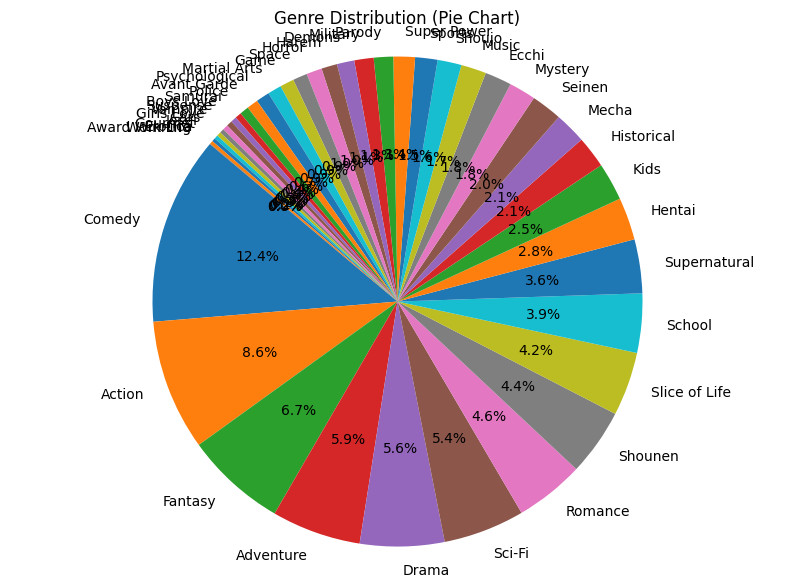

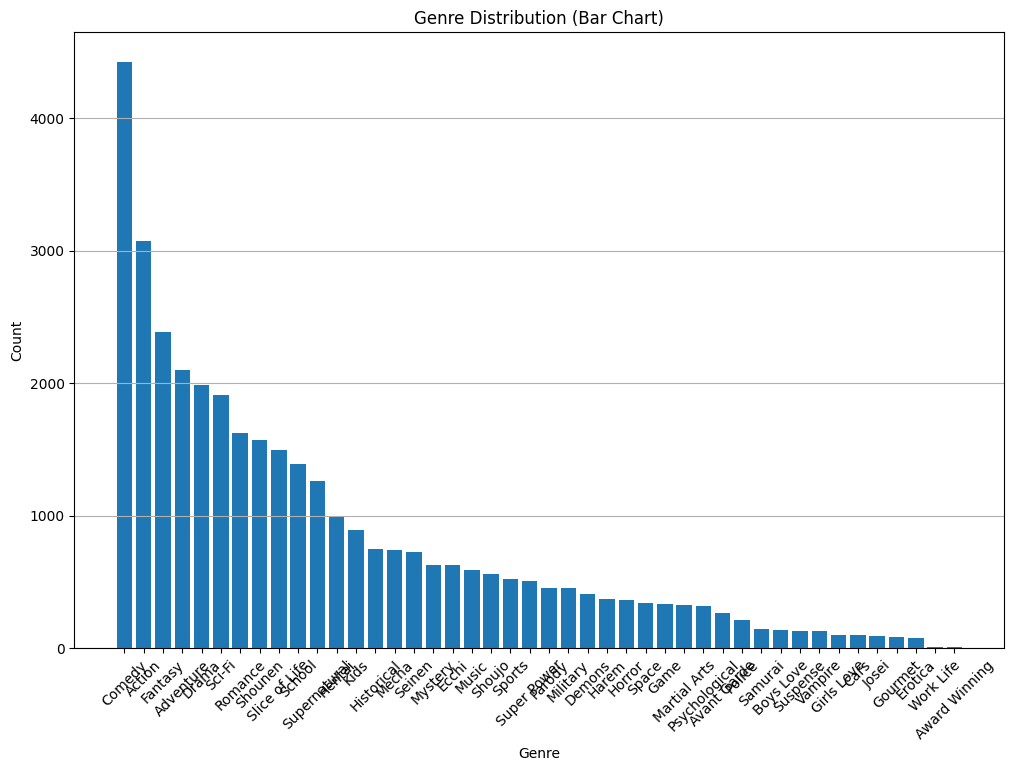

,Genre,Count,Percentage
3,Comedy,4426,12.427348
1,Action,3075,8.634003
9,Fantasy,2382,6.688193
2,Adventure,2097,5.887969
18,Drama,1982,5.565071
6,Sci-Fi,1909,5.360101
16,Romance,1625,4.562684
19,Shounen,1570,4.408255
4,Slice of Life,1499,4.208901
27,School,1391,3.905658


In [37]:
# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(genre_counts_df['Count'], labels=genre_counts_df['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(12, 8))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution (Bar Chart)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
display(genre_counts_df)

In [39]:
#Finding the percentage of each genre and separating genre smaller into Others
percentage=[]
for i in genre_counts_df["Count"]:
    percentage.append(i/genre_counts_df["Count"].sum()*100)

genre_counts_df["Percentage"]=percentage

above_1 = genre_counts_df[genre_counts_df['Percentage'] >= 1]
below_1 = genre_counts_df[genre_counts_df['Percentage'] < 1]
other_row = pd.DataFrame({
    'Genre': ['Other'],
    'Count': [below_1['Count'].sum()],
    'Percentage': [below_1['Percentage'].sum()]
})

# Concatenate the dataframes
final_df = pd.concat([above_1, other_row], ignore_index=True)
final_genre_df=final_df

In [66]:
others_list = below_1['Genre'].tolist()
print(others_list)  # prints first 5 elements

['Space', 'Game', 'Martial Arts', 'Psychological', 'Avant Garde', 'Police', 'Samurai', 'Boys Love', 'Suspense', 'Vampire', 'Girls Love', 'Cars', 'Josei', 'Gourmet', 'Erotica', 'Work Life', 'Award Winning']


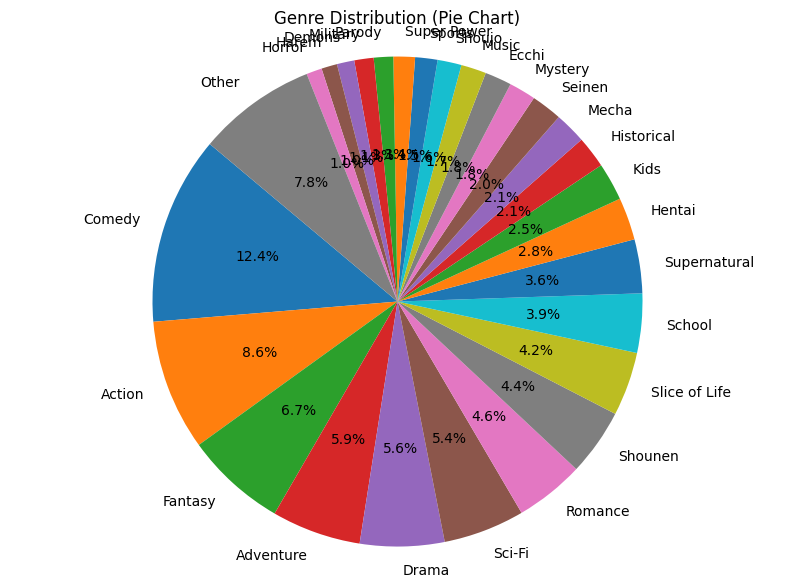

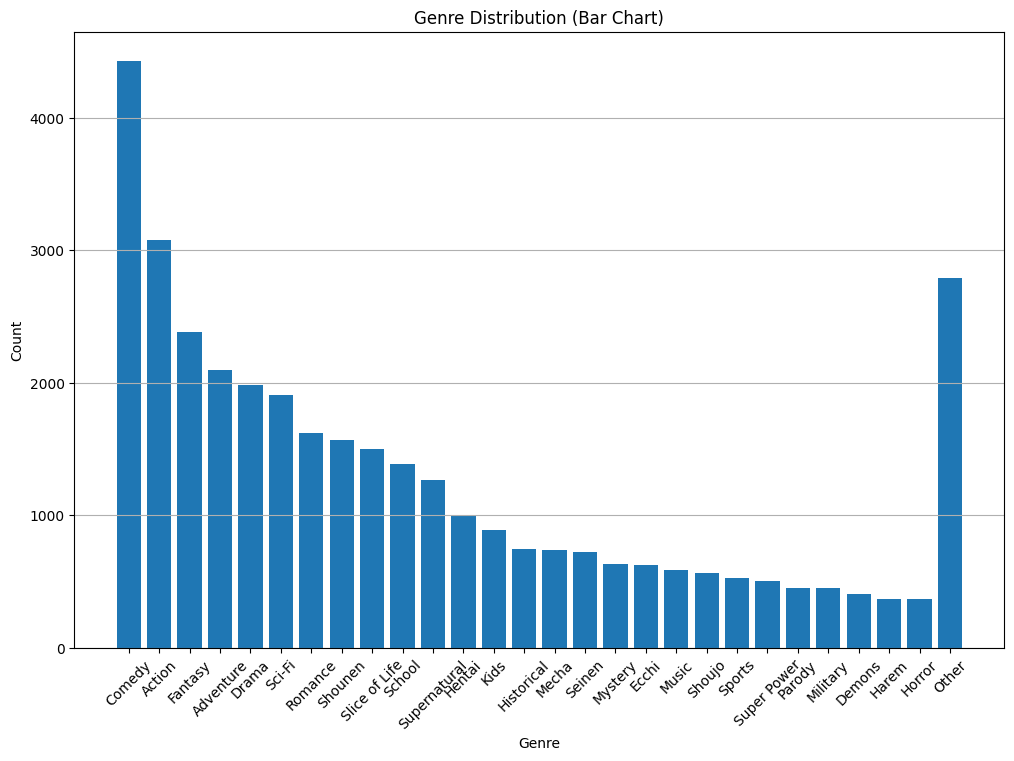

In [36]:
# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(final_df['Count'], labels=final_df['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(12, 8))
plt.bar(final_df['Genre'], final_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution (Bar Chart)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
Counter(final_cleaned_dataset_df["title"]).most_common()
Counter(final_cleaned_dataset_df["synopsis"]).most_common()
display(final_cleaned_dataset_df)

,anime_id,title,synopsis,genres,score,synopsis_word_count
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN,22
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN,48
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN,85
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN,35
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN,107
...,...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24,94
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27,8
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36,28
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66,15


In [78]:
final_cleaned_dataset_df=final_cleaned_dataset_df.drop(['score','synopsis_word_count','anime_id'],axis=1)

In [79]:
# Split genres into lists
#final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: x.split('|'))
final_cleaned_dataset_df

,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Action, Adventure]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Comedy, Slice of Life]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Action, Adventure, Kids]"
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...","[Sci-Fi, Suspense]"
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,[Ecchi]
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...","[Comedy, Fantasy, Ecchi, Parody]"
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,"[Adventure, Comedy, Fantasy, Parody]"


In [84]:
# List of genres to categorize as "Other"
genres_to_replace = others_list

# Function to replace genres
def replace_genres(genres_list, replace_list):
    return ['Other' if genre in replace_list else genre for genre in genres_list]

# Apply the function to your DataFrame
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: replace_genres(x, genres_to_replace))

# Optional: Remove duplicate 'Other' if it appears multiple times in the same list
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: list(set(x)))

final_cleaned_dataset_df

,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Adventure, Action]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Slice of Life, Comedy]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Adventure, Kids, Action]"
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...","[Other, Sci-Fi]"
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,[Ecchi]
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...","[Ecchi, Fantasy, Comedy, Parody]"
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,"[Adventure, Fantasy, Comedy, Parody]"


# Word count baseline model


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
mlb=MultiLabelBinarizer()
y = mlb.fit_transform(final_cleaned_dataset_df['genres'])
display(y)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(final_cleaned_dataset_df['synopsis'])
display(X)

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], shape=(11460, 28))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 218716 stored elements and shape (11460, 1000)>

In [101]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X, y)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [109]:
new_synopsis = ["Love"]

X_new = vectorizer.transform(new_synopsis)
y_pred = classifier.predict(X_new)
display(y_pred)
# Convert predictions back to genre labels
predicted_genres = mlb.inverse_transform(y_pred)
print(predicted_genres)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

[()]


In [110]:
from sklearn.metrics import classification_report

y_pred_train = classifier.predict(X)
print(classification_report(y, y_pred_train, target_names=mlb.classes_))

               precision    recall  f1-score   support

       Action       0.76      0.53      0.62      3075
    Adventure       0.76      0.47      0.58      2097
       Comedy       0.72      0.59      0.65      4426
       Demons       0.93      0.37      0.53       409
        Drama       0.70      0.29      0.41      1982
        Ecchi       0.86      0.19      0.31       629
      Fantasy       0.79      0.45      0.57      2382
        Harem       0.93      0.33      0.48       370
       Hentai       0.91      0.67      0.77       999
   Historical       0.82      0.33      0.47       746
       Horror       0.97      0.34      0.51       366
         Kids       0.87      0.39      0.54       889
        Mecha       0.91      0.56      0.69       741
     Military       0.91      0.48      0.63       454
        Music       0.90      0.45      0.60       592
      Mystery       0.90      0.49      0.63       630
        Other       0.73      0.34      0.46      2470
       Pa

c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
from my_import import *